# Виклик: Аналіз тексту про науку про дані

У цьому прикладі ми виконаємо просту вправу, яка охоплює всі етапи традиційного процесу науки про дані. Вам не потрібно писати код, ви можете просто натиснути на комірки нижче, щоб виконати їх і спостерігати за результатом. Як виклик, вам пропонується спробувати цей код із різними даними.

## Мета

У цьому уроці ми обговорювали різні концепції, пов'язані з наукою про дані. Давайте спробуємо відкрити більше пов'язаних концепцій, виконуючи **текстовий аналіз**. Ми почнемо з тексту про науку про дані, витягнемо ключові слова з нього, а потім спробуємо візуалізувати результат.

Як текст, я використаю сторінку про науку про дані з Вікіпедії:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Крок 1: Отримання даних

Перший крок у будь-якому процесі аналізу даних — це отримання даних. Ми будемо використовувати бібліотеку `requests` для цього:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Крок 2: Трансформація даних

Наступний крок — перетворити дані у форму, придатну для обробки. У нашому випадку ми завантажили HTML-код сторінки, і тепер нам потрібно перетворити його на звичайний текст.

Існує багато способів зробити це. Ми використаємо найпростіший вбудований об'єкт [HTMLParser](https://docs.python.org/3/library/html.parser.html) з Python. Нам потрібно створити підклас класу `HTMLParser` і визначити код, який буде збирати весь текст всередині HTML-тегів, за винятком тегів `<script>` і `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Крок 3: Отримання інсайтів

Найважливіший крок — це перетворення наших даних у форму, з якої можна отримати інсайти. У нашому випадку ми хочемо виділити ключові слова з тексту та визначити, які з них є найбільш значущими.

Ми будемо використовувати бібліотеку Python під назвою [RAKE](https://github.com/aneesha/RAKE) для виділення ключових слів. Спочатку встановимо цю бібліотеку, якщо вона ще не встановлена:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Основна функціональність доступна через об'єкт `Rake`, який ми можемо налаштувати за допомогою деяких параметрів. У нашому випадку ми встановимо мінімальну довжину ключового слова на рівні 5 символів, мінімальну частоту ключового слова в документі - 3, а максимальну кількість слів у ключовому слові - 2. Не соромтеся експериментувати з іншими значеннями та спостерігати за результатом.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Ми отримали список термінів разом із відповідним ступенем важливості. Як ви можете бачити, найбільш релевантні дисципліни, такі як машинне навчання та великі дані, знаходяться у верхніх позиціях списку.

## Крок 4: Візуалізація результату

Люди найкраще сприймають дані у візуальній формі. Тому часто має сенс візуалізувати дані, щоб отримати певні висновки. Ми можемо використати бібліотеку `matplotlib` у Python, щоб побудувати простий розподіл ключових слів із їхньою релевантністю:


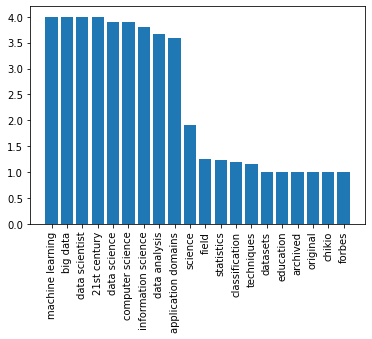

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Існує, однак, ще кращий спосіб візуалізувати частоти слів - використовуючи **Word Cloud**. Нам потрібно встановити ще одну бібліотеку, щоб побудувати хмару слів із нашого списку ключових слів.


In [71]:
!{sys.executable} -m pip install wordcloud

Об'єкт `WordCloud` відповідає за прийом або оригінального тексту, або попередньо обчисленого списку слів з їх частотами, і повертає зображення, яке потім можна відобразити за допомогою `matplotlib`:


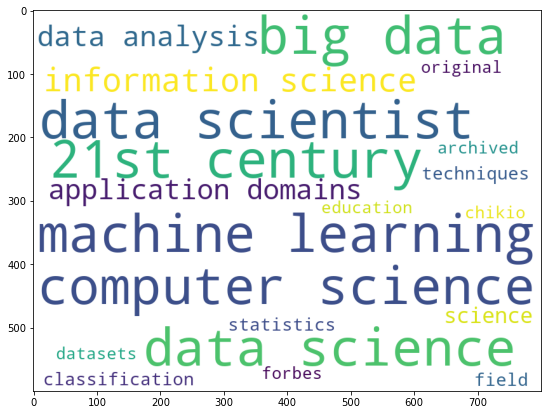

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Ми також можемо передати оригінальний текст до `WordCloud` - давайте подивимося, чи зможемо ми отримати подібний результат:


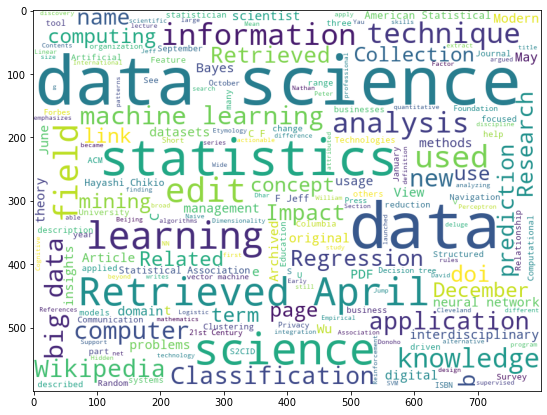

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Ви можете побачити, що хмарка слів тепер виглядає більш вражаюче, але вона також містить багато шуму (наприклад, нерелевантні слова, такі як `Retrieved on`). Також ми отримуємо менше ключових слів, що складаються з двох слів, таких як *data scientist* або *computer science*. Це тому, що алгоритм RAKE набагато краще справляється з вибором якісних ключових слів із тексту. Цей приклад ілюструє важливість попередньої обробки та очищення даних, адже чітка картина в кінці дозволить нам приймати кращі рішення.

У цій вправі ми пройшли простий процес вилучення певного сенсу з тексту Вікіпедії у формі ключових слів і хмарки слів. Цей приклад досить простий, але він добре демонструє всі типові кроки, які виконує дата-сайєнтист під час роботи з даними, починаючи від отримання даних і закінчуючи візуалізацією.

У нашому курсі ми детально обговоримо всі ці кроки.



---

**Відмова від відповідальності**:  
Цей документ був перекладений за допомогою сервісу автоматичного перекладу [Co-op Translator](https://github.com/Azure/co-op-translator). Хоча ми прагнемо до точності, будь ласка, майте на увазі, що автоматичні переклади можуть містити помилки або неточності. Оригінальний документ на його рідній мові слід вважати авторитетним джерелом. Для критичної інформації рекомендується професійний людський переклад. Ми не несемо відповідальності за будь-які непорозуміння або неправильні тлумачення, що виникають внаслідок використання цього перекладу.
